# Data loading and Setup

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [2]:
import chardet
def get_encoding(file_path):

    with open(file_path,'rb') as f:
            data = f.read(10000)
    return chardet.detect(data).get("encoding")

In [51]:
def draw_heatmap(keys: List[str], values: List[float]) -> None:
    start_index = 0
    end_index = 20
    keys = list(keys)
    values = list(values)
    snsdf = pd.DataFrame.from_dict({'urls': keys[start_index:end_index], 'values': values[start_index:end_index]})
    heatmap3_data = pd.pivot_table(snsdf,values='values', index=['urls']).sort_values(by=['values'], ascending=False)
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap3_data, cmap="Blues")
    return

In [4]:
file_path = './Export _  _ 3. August 2022 – 8. März 2023.csv'
df = pd.read_csv(file_path, encoding=get_encoding(file_path))
# df.head(5)

C:\Users\Siddiquee\AppData\Local\Temp\ipykernel_13684\2969547482.py:2: DtypeWarning: Columns (38,40,162,169,170,171,172,234,241,245,246,247,248,252,253,263,292,299,303,304,318,333,348,351,355,356,370,385,400,415,430,445,456,473,518,523,525,527,529,533,537,542,544,546,550,557,563,610,660,666,671,673,677,681,682,684,687,688,689,690,692,693,696,698,699,701,703,704,705,707,708,711,713,714,716,718,719,720,722,723,726,728,729,731,733,734,735,737,738,741,743,744,746,748,749,750,752,753,756,758,759,761,763,764,765,767,768,771,773,774,776,778,779,780,782,783,786,788,789,791,793,794,795,797,798,801,802,803,804,806,807,808,810,811,814,816,817,819,821,822,823,825,826,829,831,832,834,836,837,838,840,841,844,846,847,849,851,852,853,855,856,859,861,862,863,864,866,867,868,870,871,874,876,877,879,881,882,883,885,886,889,891,892,894,896,897,898,900,901,904,906,907,909,911,912,913,915,916,919,921,922,924,926,930,933,935,937,939,941,943,945,949,952,956,957,959,961,963,965,967,969,970,971,973,974,976,978,

In [10]:
with open('./header.txt', 'w') as header_file:
    for column in df.columns:
        header_file.write(column)
        header_file.write('\n')
    
    header_file.flush()

# Calculation of Highest Exit Rates

In [11]:
df.groupby(by=['goalConversions']).count()

,idSite,idVisit,visitIp,visitorId,fingerprint,type (actionDetails 0),url (actionDetails 0),pageTitle (actionDetails 0),pageIdAction (actionDetails 0),idpageview (actionDetails 0),...,iconSVG (actionDetails 75),timestamp (actionDetails 75),pageLoadTime (actionDetails 24),pageLoadTimeMilliseconds (actionDetails 24),pageLoadTime (actionDetails 25),pageLoadTimeMilliseconds (actionDetails 25),pageLoadTime (actionDetails 35),pageLoadTimeMilliseconds (actionDetails 35),pageLoadTime (actionDetails 28),pageLoadTimeMilliseconds (actionDetails 28)
goalConversions,,,,,,,,,,,,,,,,,,,,,
0,1285,1285,1285,1285,1285,1285,1285,1267,1285,1285,...,1,1,2,2,1,1,1,1,1,1
1,350,350,350,350,350,350,350,348,350,350,...,0,0,0,0,0,0,0,0,0,0


In [45]:
unique_urls = df['url (actionDetails 0)'].unique()
sorted(unique_urls)

['http://192.168.178.102:8080/',
 'http://foodforthought.media/de/sibels-journey-2/',
 'http://localhost/',
 'http://localhost/de/angebote/haydee-digitale-nachhilfe',
 'http://localhost/konferenz',
 'http://localhost:8080/',
 'http://localhost:8080/de/angebote/klassengedanken',
 'http://localhost:8080/vinedig',
 'http://localhost:8083/',
 'http://www.inclusive-solutions.org/seite/570438/wir.html',
 'http://www.pial-consult.com/?ref=wfv',
 'https://afrikanischer-tanz.de/inklusives-tanzprojekt-in-hamburg/',
 'https://www.7xjung.de/die-freiheit-die-ich-meine/fortbildungen-fuer-fachkraefte/',
 'https://www.berlin2023.org/de/mach-mit',
 'https://www.betterplace.org/de/projects/91900?utm_campaign=user_share&utm_medium=ppp_sticky&utm_source=Link',
 'https://www.eventbrite.de/e/vielfalt-netzwerkt-digital-antirassismus-gender-tickets-506036186857',
 'https://www.facebook.com/stiftungweltethos',
 'https://www.instagram.com/interreligious__peers/',
 'https://www.instagram.com/sibels_journey/',
 '

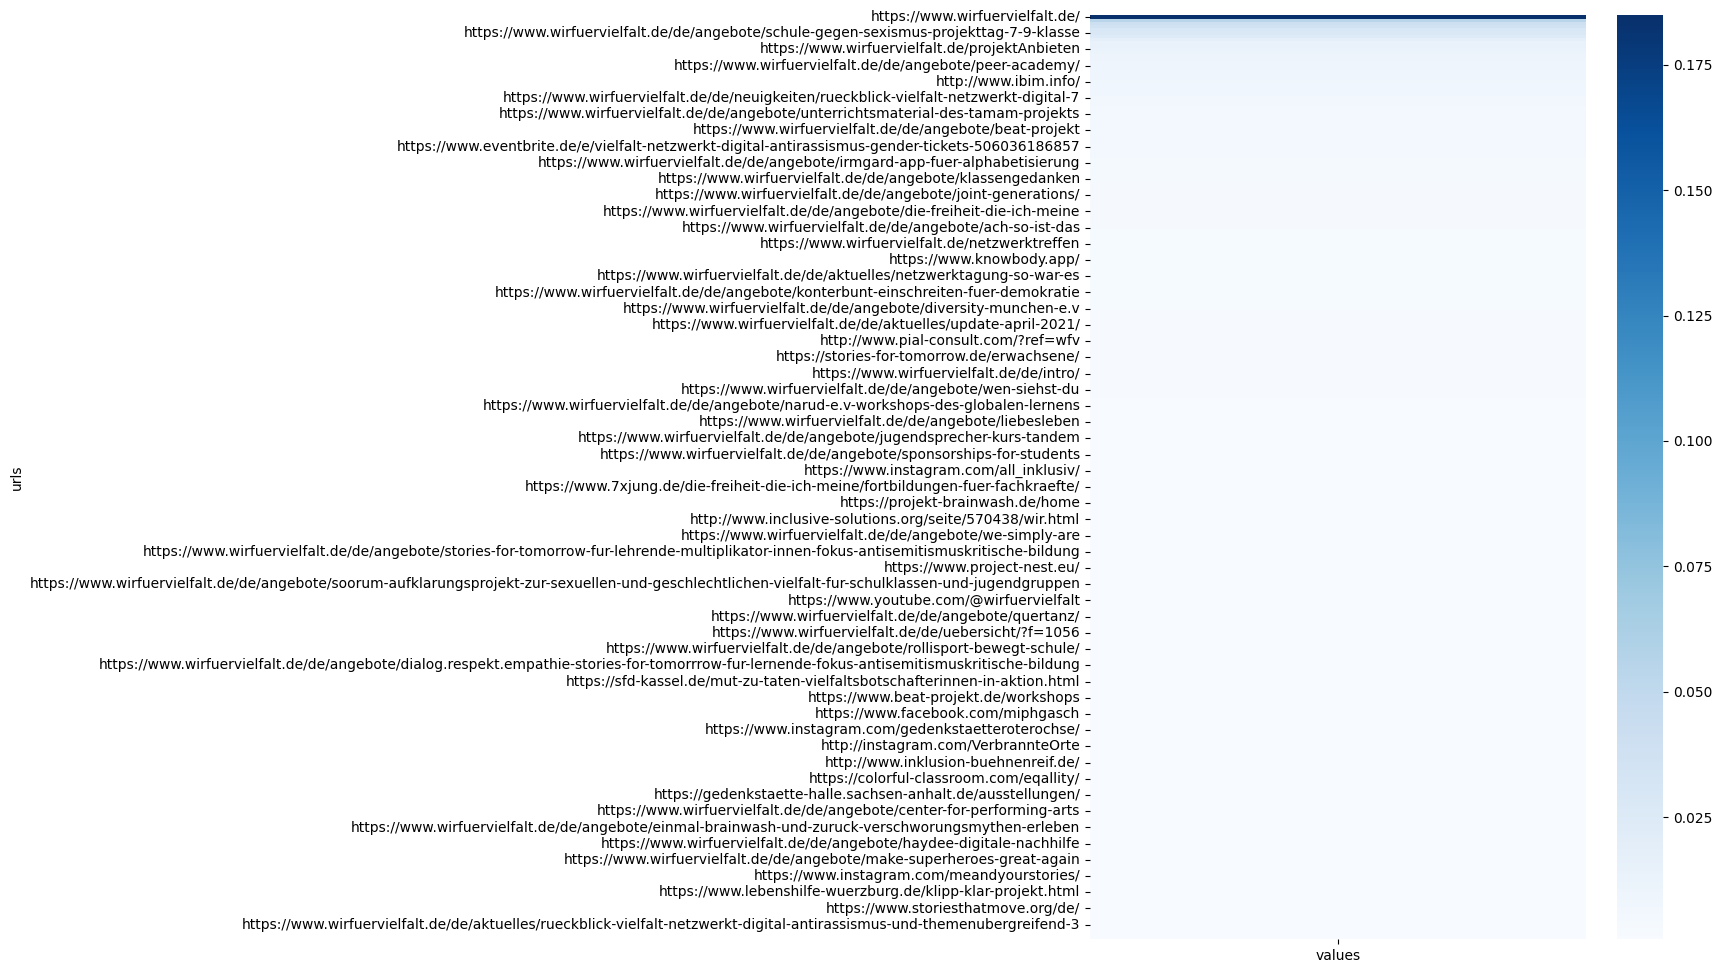

In [30]:
import math
last_url_list = []
for index, row in df.iterrows():
    i = 0
    last_url = None
    while i < 76:
        if i == 75:
            row_header = 'url (actionDetails {i})'.format(i = i)
            if type(row[row_header]) == str:
                last_url = row['url (actionDetails {i})'.format(i = i)]
        else:
            row_header = 'url (actionDetails {i})'.format(i = i+1)
            if type(row[row_header]) != str and math.isnan(row[row_header]):
                
                last_url = row['url (actionDetails {i})'.format(i = i)]
                break
        i += 1
    if "192.168.178.102" not in last_url and "localhost" not in last_url:
        last_url_list.append(last_url)

freq = {}
length_of_url_list = len(last_url_list)
for item in last_url_list:
    if (item in freq):
        freq[item] += 1
    else:
        freq[item] = 1

for k, v in freq.items():
    freq[k] = v/length_of_url_list

freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
draw_heatmap(freq.keys(), freq.values())

In [35]:
freq = {}
length_of_url_list = len(last_url_list)
for item in last_url_list:
    if (item in freq):
        freq[item] += 1
    else:
        freq[item] = 1

freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
for k, v in freq.items():
    freq[k] = round(v/length_of_url_list, 2)
freq

{'https://www.wirfuervielfalt.de/': 0.18,
 'https://www.wirfuervielfalt.de/ueberUns': 0.05,
 'https://www.wirfuervielfalt.de/vinedig': 0.04,
 'https://www.wirfuervielfalt.de/de/angebote/werde-volunteer-special-olympics-world-games-berlin-2023': 0.04,
 'https://www.berlin2023.org/de/mach-mit': 0.03,
 'https://www.wirfuervielfalt.de/de/angebote/schule-gegen-sexismus-projekttag-7-9-klasse': 0.03,
 'https://www.wirfuervielfalt.de/projektsuche': 0.02,
 'https://www.wirfuervielfalt.de/de/angebote/ag-gender-and-queer-education': 0.02,
 'https://www.wirfuervielfalt.de/de/angebote/stattwerkstatt/': 0.01,
 'https://www.wirfuervielfalt.de/de/neuigkeiten/netzwerktagung-so-war-es': 0.01,
 'https://www.wirfuervielfalt.de/projektAnbieten': 0.01,
 'https://www.wirfuervielfalt.de/kontakt': 0.01,
 'https://www.wirfuervielfalt.de/aktuelles': 0.01,
 'https://www.instagram.com/wirfuervielfalt/': 0.01,
 'https://www.wirfuervielfalt.de/de/angebote/peer-academy/': 0.01,
 'https://www.wirfuervielfalt.de/projek

# Calculating Most Visited Page

In [31]:
import math
all_url_list = []
for index, row in df.iterrows():
    i = 0
    last_url = None
    while i < 76:
        if i == 75:
            row_header = 'url (actionDetails {i})'.format(i = i)
            if type(row[row_header]) == str:
                url = row['url (actionDetails {i})'.format(i = i)]
                if "192.168.178.102" not in url and "localhost" not in url:
                    all_url_list.append(url)
        else:
            row_header = 'url (actionDetails {i})'.format(i = i+1)
            if type(row[row_header]) != str and math.isnan(row[row_header]):
                break
            else:
                url = row['url (actionDetails {i})'.format(i = i)]
                if "192.168.178.102" not in url and "localhost" not in url:
                    all_url_list.append(row['url (actionDetails {i})'.format(i = i)])
        i += 1
    
len(all_url_list)


3745

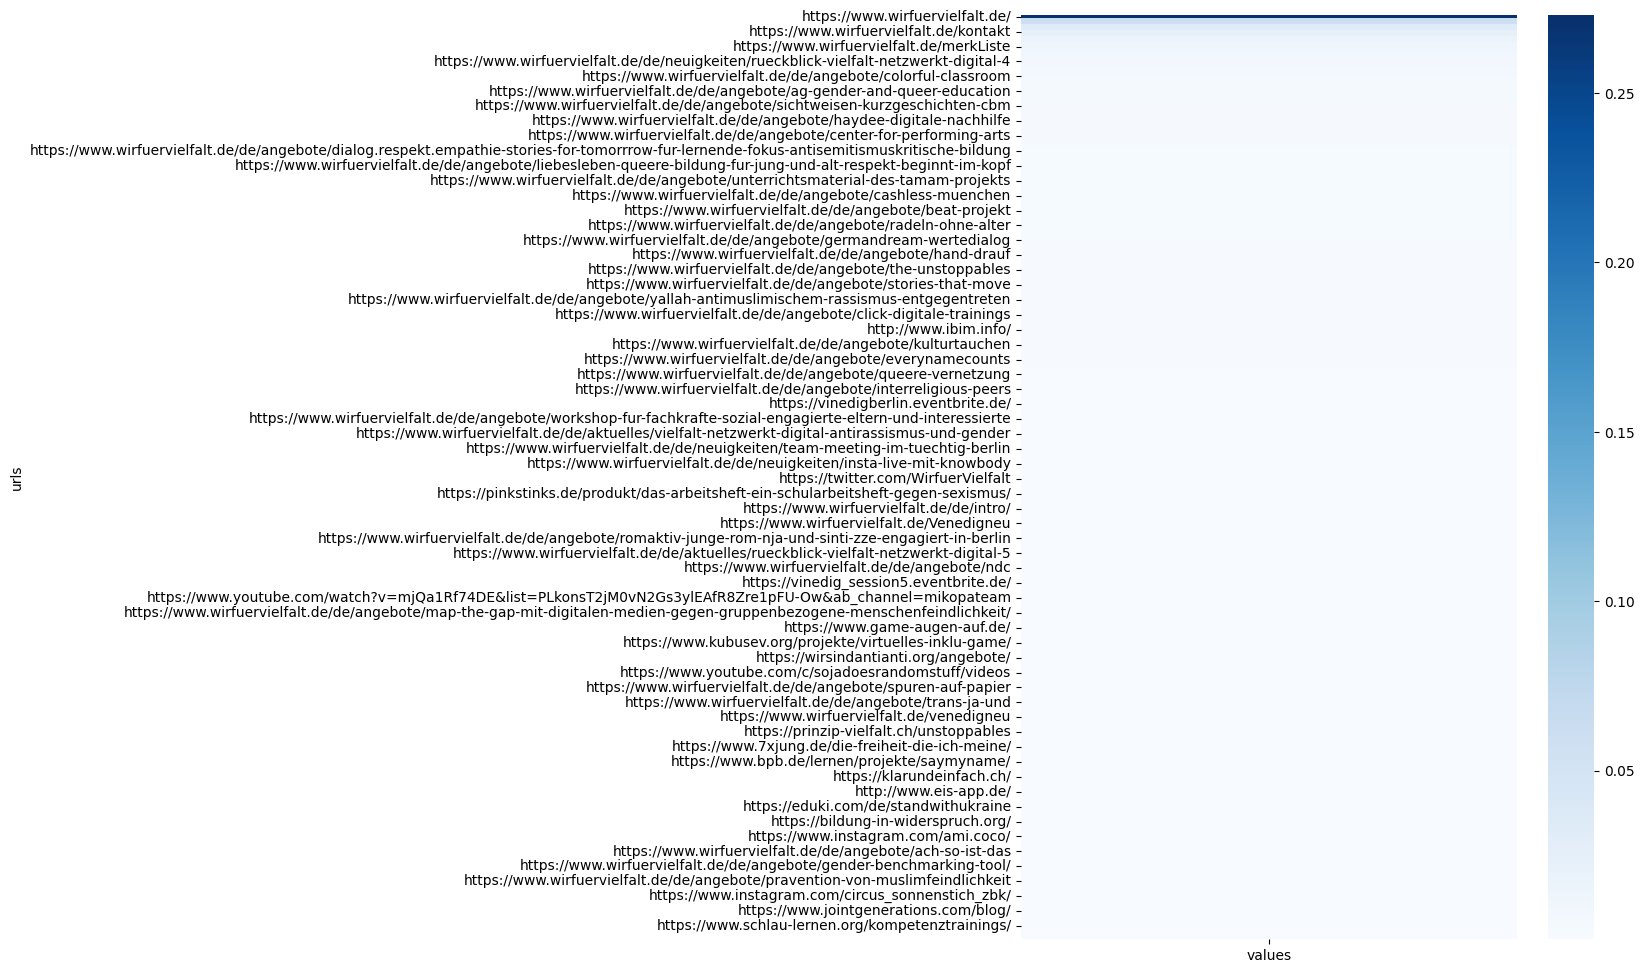

In [32]:
total_url = len(all_url_list)
all_url_freq = {}

for item in all_url_list:
    if (item in all_url_freq):
        all_url_freq[item] += 1
    else:
        all_url_freq[item] = 1

for k, v in all_url_freq.items():
    all_url_freq[k] = v/total_url

all_url_freq = dict(sorted(all_url_freq.items(), key=lambda item: item[1], reverse=True))
draw_heatmap(all_url_freq.keys(), all_url_freq.values())

# Average Length of Visit

In [33]:
visit_lengths = []
for index, row in df.iterrows():
    i = 0
    while i < 76:
        row_header = 'url (actionDetails {i})'.format(i = i)
        if type(row[row_header]) != str and math.isnan(row[row_header]):
            visit_lengths.append(i+1)
            break
        i += 1
        
len(visit_lengths)

1634

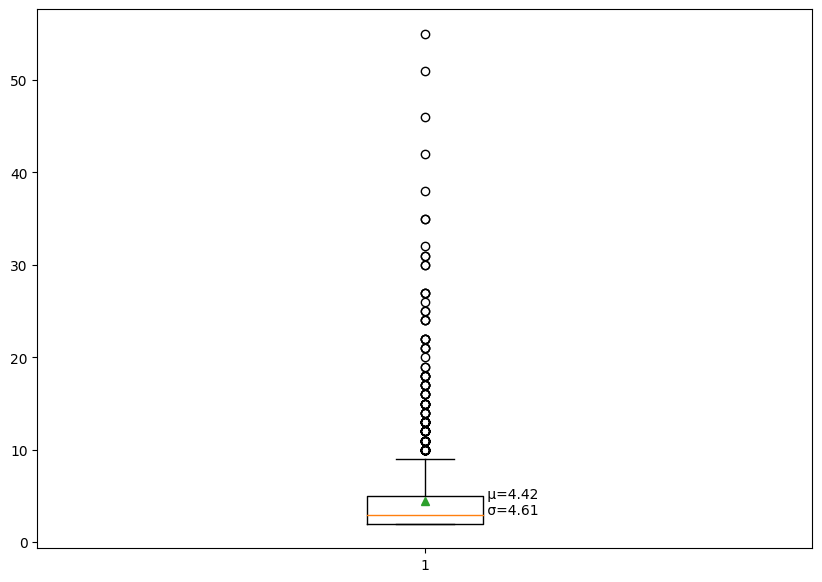

In [34]:
arr = np.array(visit_lengths)

m1 = arr.mean(axis=0)
st1 = arr.std(axis=0)

fig = plt.figure(figsize =(10, 7))

bp = plt.boxplot(visit_lengths, showmeans=True)

for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σ={:.2f}'.format(m1, st1)
    plt.annotate(text, xy=(x, y))

 
# show plot
plt.show()

# URLs That Triggered Conversion

In [39]:
import math

last_url_list = []
goal_df = df[df.goalConversions == 1]

for index, row in goal_df.iterrows():
    
    i = 0
    last_url = None
    while i < 76:
        
        if i == 75:
            row_header = 'url (actionDetails {i})'.format(i = i)
            if type(row[row_header]) == str:
                last_url = row['url (actionDetails {i})'.format(i = i)]
        else:
            row_header = 'url (actionDetails {i})'.format(i = i+1)
            if type(row[row_header]) != str and math.isnan(row[row_header]):
                last_url = row['url (actionDetails {i})'.format(i = i)]
                break
        i += 1
    
    if "192.168.178.102" not in last_url and "localhost" not in last_url:
        last_url_list.append(last_url)    
    last_url_list.append(last_url)
    
len(last_url_list)

693

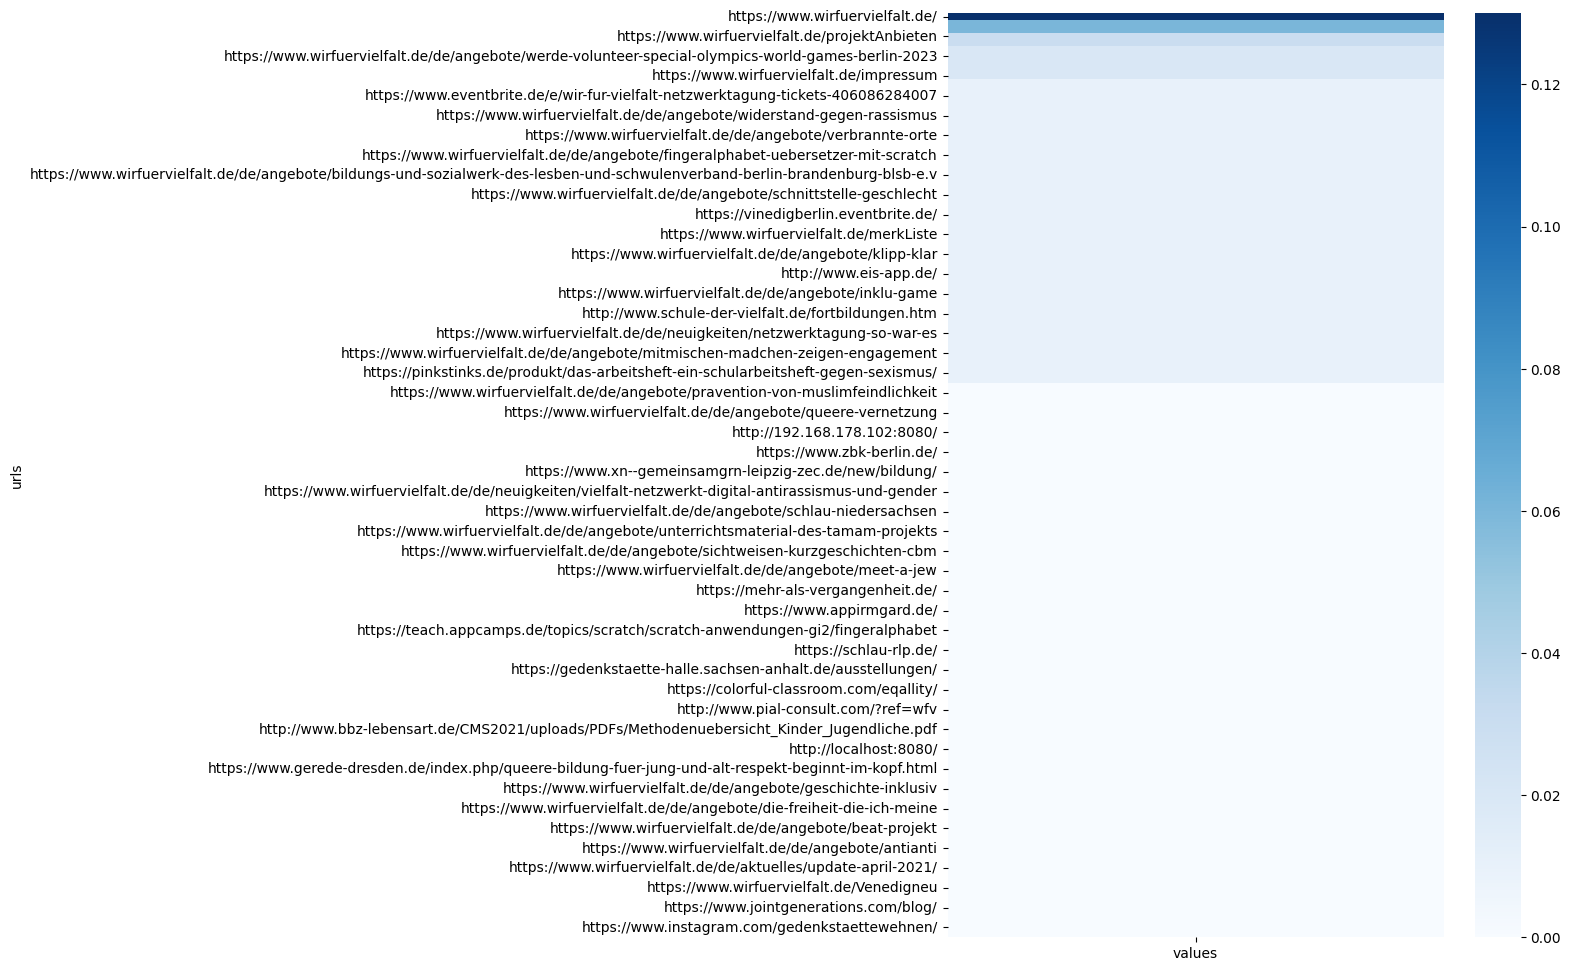

In [40]:
total_url = len(last_url_list)
all_url_freq = {}

for item in last_url_list:
    if (item in all_url_freq):
        all_url_freq[item] += 1
    else:
        all_url_freq[item] = 1

for k, v in all_url_freq.items():
    all_url_freq[k] = round(v/total_url, 2)

all_url_freq = dict(sorted(all_url_freq.items(), key=lambda item: item[1], reverse=True))
draw_heatmap(all_url_freq.keys(), all_url_freq.values())

# Avg Time Spent Per URL

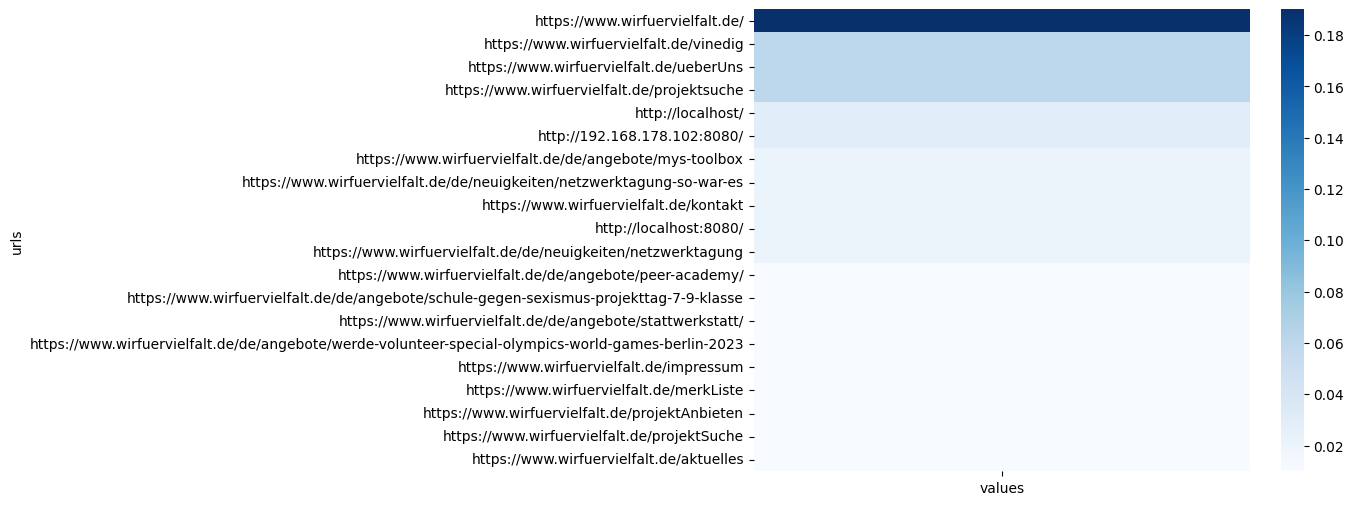

In [52]:
total_time_spent = 0.0
all_url_dict = {}

for index, row in df.iterrows():
    i = 0
    last_url = None
    while i < 76:
        row_header = 'url (actionDetails {i})'.format(i = i)
        if type(row[row_header]) != str and math.isnan(row[row_header]):
            break
        else:
            url = row['url (actionDetails {i})'.format(i = i)]
            if not math.isnan(row['timeSpent (actionDetails {i})'.format(i = i)]):
                time = float(row['timeSpent (actionDetails {i})'.format(i = i)])
                total_time_spent += time
                if (url in all_url_dict):
                    all_url_dict[url] += time
                else:
                    all_url_dict[url] = time
        i += 1

for k, v in all_url_dict.items():
    all_url_dict[k] = round(v/total_time_spent, 2)

all_url_dict = dict(sorted(all_url_dict.items(), key=lambda item: item[1], reverse=True))
total_time_spent
draw_heatmap(all_url_dict.keys(), all_url_dict.values())

# Loading Time Per Link

ran into keyerror for 457 and 27
ran into keyerror for 457 and 29
ran into keyerror for 457 and 30
ran into keyerror for 457 and 32
ran into keyerror for 457 and 33
ran into keyerror for 680 and 27
ran into keyerror for 798 and 27
ran into keyerror for 798 and 29
ran into keyerror for 798 and 30
ran into keyerror for 857 and 27
ran into keyerror for 857 and 29
ran into keyerror for 857 and 30
ran into keyerror for 857 and 32
ran into keyerror for 857 and 33
ran into keyerror for 857 and 37
ran into keyerror for 857 and 38
ran into keyerror for 857 and 39
ran into keyerror for 857 and 42
ran into keyerror for 857 and 43
ran into keyerror for 857 and 44
ran into keyerror for 857 and 45
ran into keyerror for 857 and 46
ran into keyerror for 857 and 47
ran into keyerror for 857 and 48
ran into keyerror for 857 and 49
ran into keyerror for 861 and 27
ran into keyerror for 863 and 27
ran into keyerror for 863 and 29
ran into keyerror for 1039 and 27
ran into keyerror for 1039 and 29
ran into

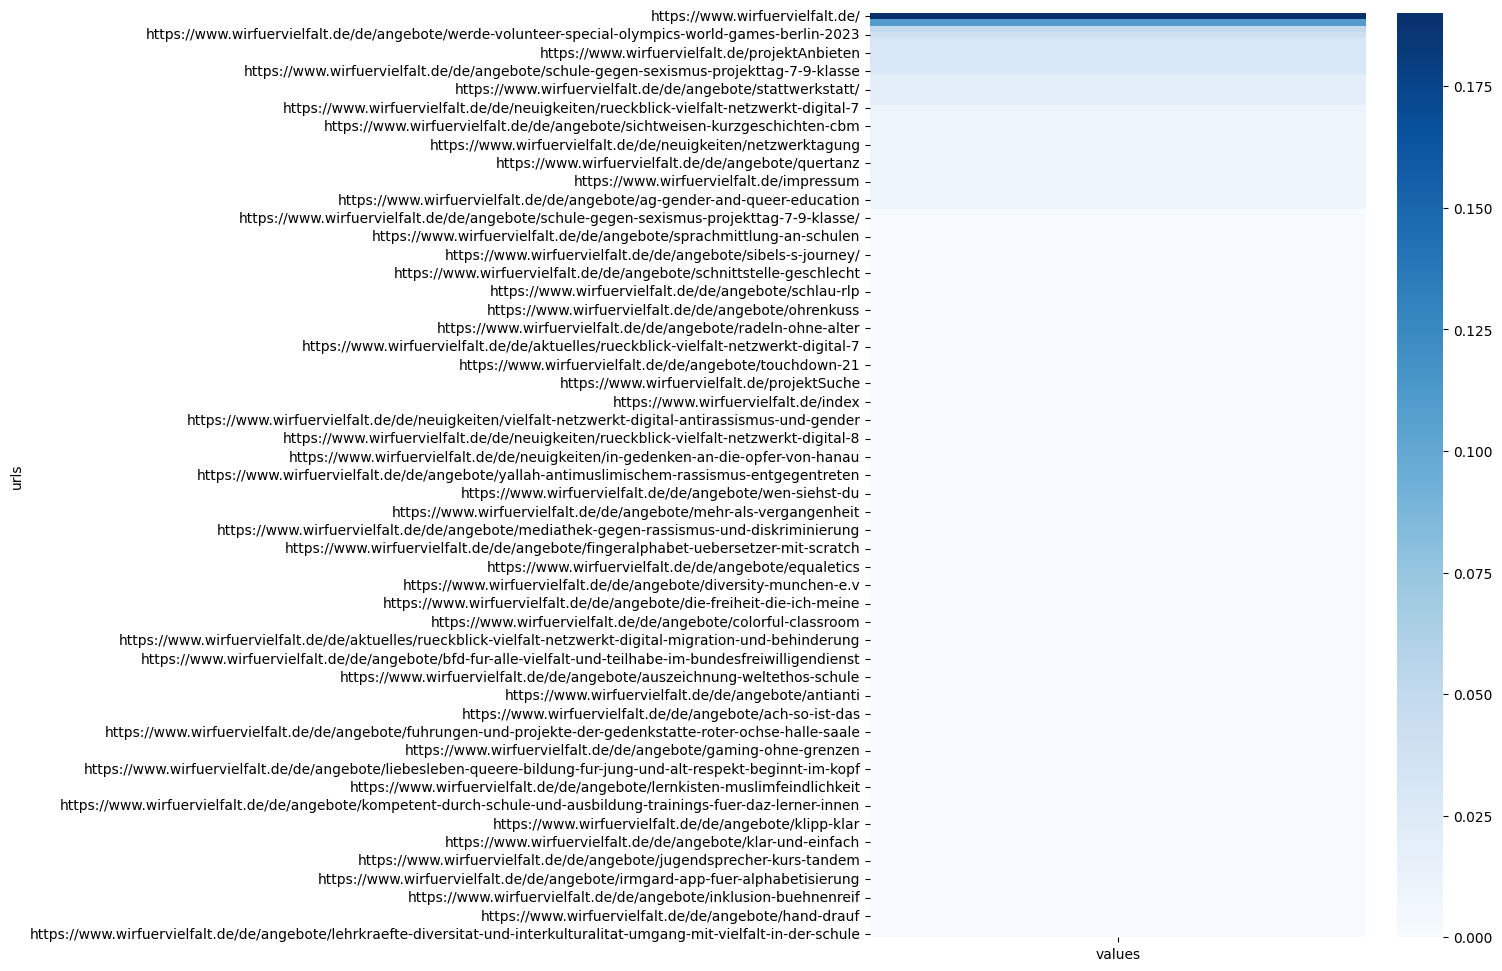

In [43]:
# pageLoadTimeMilliseconds (actionDetails {i})

total_load_time = 0.0
all_url_dict = {}

for index, row in df.iterrows():
    i = 0
    last_url = None
    while i < 76:
        try:
            row_header = 'url (actionDetails {i})'.format(i = i)
            if type(row[row_header]) != str and math.isnan(row[row_header]):
                break
            else:
                url = row['url (actionDetails {i})'.format(i = i)]
                if not math.isnan(row['pageLoadTimeMilliseconds (actionDetails {i})'.format(i = i)]):
                    time = float(row['pageLoadTimeMilliseconds (actionDetails {i})'.format(i = i)])
                    total_load_time += time
                    if (url in all_url_dict):
                        all_url_dict[url] += time
                    else:
                        all_url_dict[url] = time
        except KeyError:
            print('ran into keyerror for {index} and {i}'.format(index=index, i = i))
        i += 1

for k, v in all_url_dict.items():
    all_url_dict[k] = round(v/total_load_time, 2)

all_url_dict = dict(sorted(all_url_dict.items(), key=lambda item: item[1], reverse=True))
total_load_time, all_url_dict

draw_heatmap(all_url_dict.keys(), all_url_dict.values())